# **Training vs Validation loss**

There are several typical patterns we can observe in training and validation loss curves during the training process of a machine learning model. Here are some and what they might indicate:

1. **`Ideal Case:`** The training loss and the validation loss both decrease with time and then plateau at some point. This is the ideal scenario showing that the model is learning correctly, and it's not overfitting or underfitting. It has generalized well to the validation data.

2. **`Overfitting:`** If the training loss continues to decrease with time but the validation loss decreases initially and then starts increasing, this means that the model is overfitting. This happens when the model learns the training data "too well", capturing noise and outliers, and fails to generalize to unseen data. The model has high variance.

3. **`Underfitting:`** If both the training loss and the validation loss are high or if they decrease initially and then plateau while still being high, then the model is underfitting. This occurs when the model fails to learn the underlying patterns in the data. The model has high bias.

4. **`High Bias and High Variance:`** If the training loss is high and the validation loss is even higher, the model suffers from both high bias and high variance. This means the model is not fitting the training data well and is also not generalizing well to unseen data.

### **To rectify these situations:**

**`Overfitting:`** Consider using regularization techniques, dropout layers (in case of neural networks), adding more data, reducing model complexity, or early stopping.

**`Underfitting:`** Consider making the model more complex. For instance, you might add more layers in a neural network or add more features in a classical machine learning model. You could also consider reducing the amount of regularization if any is being used.

**`High Bias and High Variance:`** Diagnosing a model with both high bias and high variance can be tricky as the solutions for high bias and high variance often contradict each other. You may try to find a better balance in the model's complexity, tuning the hyperparameters, adding more useful features, or collecting more data. Model ensembling can also be a good technique to mitigate this issue.

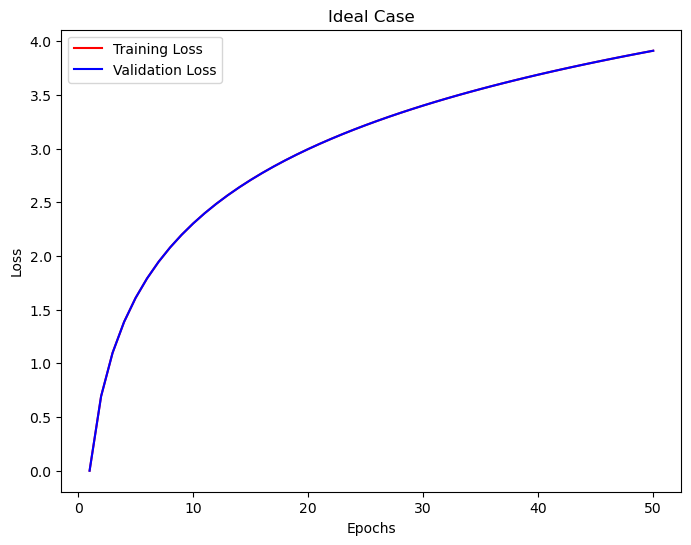

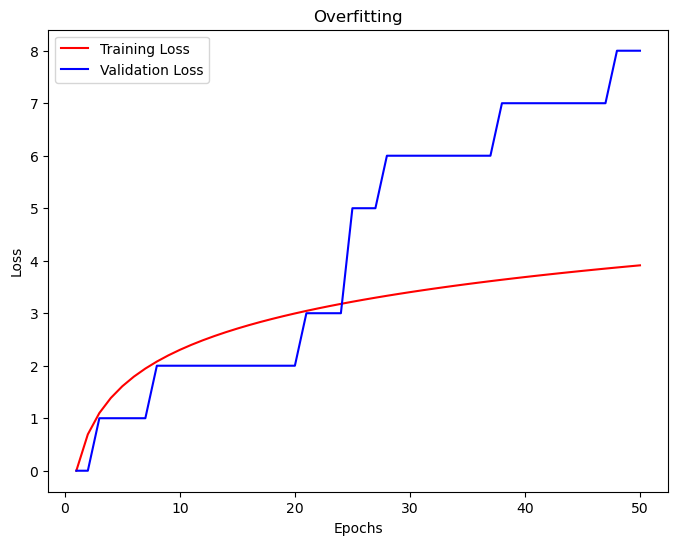

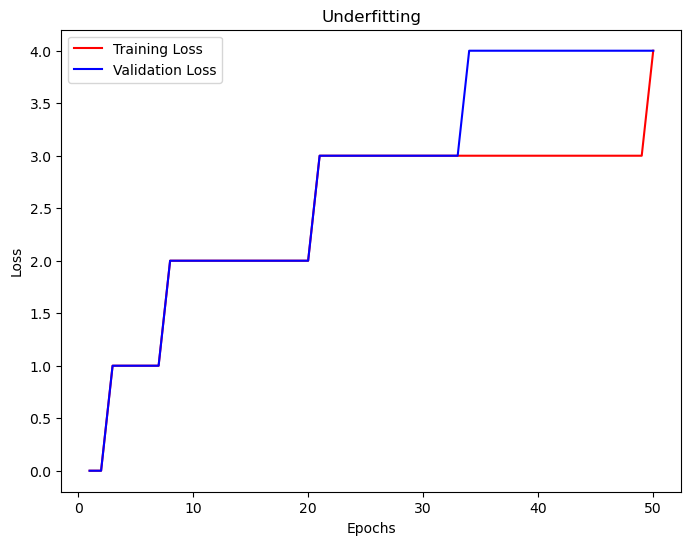

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Hypothetical loss values
epochs = np.arange(1, 51)

# 1. Ideal Case
train_loss_ideal = np.log(epochs)
val_loss_ideal = np.log(epochs)

plt.figure(figsize=(8,6))
plt.plot(epochs, train_loss_ideal, 'r', label='Training Loss')
plt.plot(epochs, val_loss_ideal, 'b', label='Validation Loss')
plt.title('Ideal Case')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2. Overfitting
train_loss_overfit = np.log(epochs)
val_loss_overfit = np.piecewise(epochs, [epochs<25, epochs>=25], [lambda epochs: np.log(epochs), lambda epochs: 0.1*epochs + np.log(25)])

plt.figure(figsize=(8,6))
plt.plot(epochs, train_loss_overfit, 'r', label='Training Loss')
plt.plot(epochs, val_loss_overfit, 'b', label='Validation Loss')
plt.title('Overfitting')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 3. Underfitting
train_loss_underfit = np.piecewise(epochs, [epochs<25, epochs>=25], [lambda epochs: np.log(epochs), lambda epochs: 3 + 0.02*epochs])
val_loss_underfit = np.piecewise(epochs, [epochs<25, epochs>=25], [lambda epochs: np.log(epochs), lambda epochs: 3 + 0.03*epochs])

plt.figure(figsize=(8,6))
plt.plot(epochs, train_loss_underfit, 'r', label='Training Loss')
plt.plot(epochs, val_loss_underfit, 'b', label='Validation Loss')
plt.title('Underfitting')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


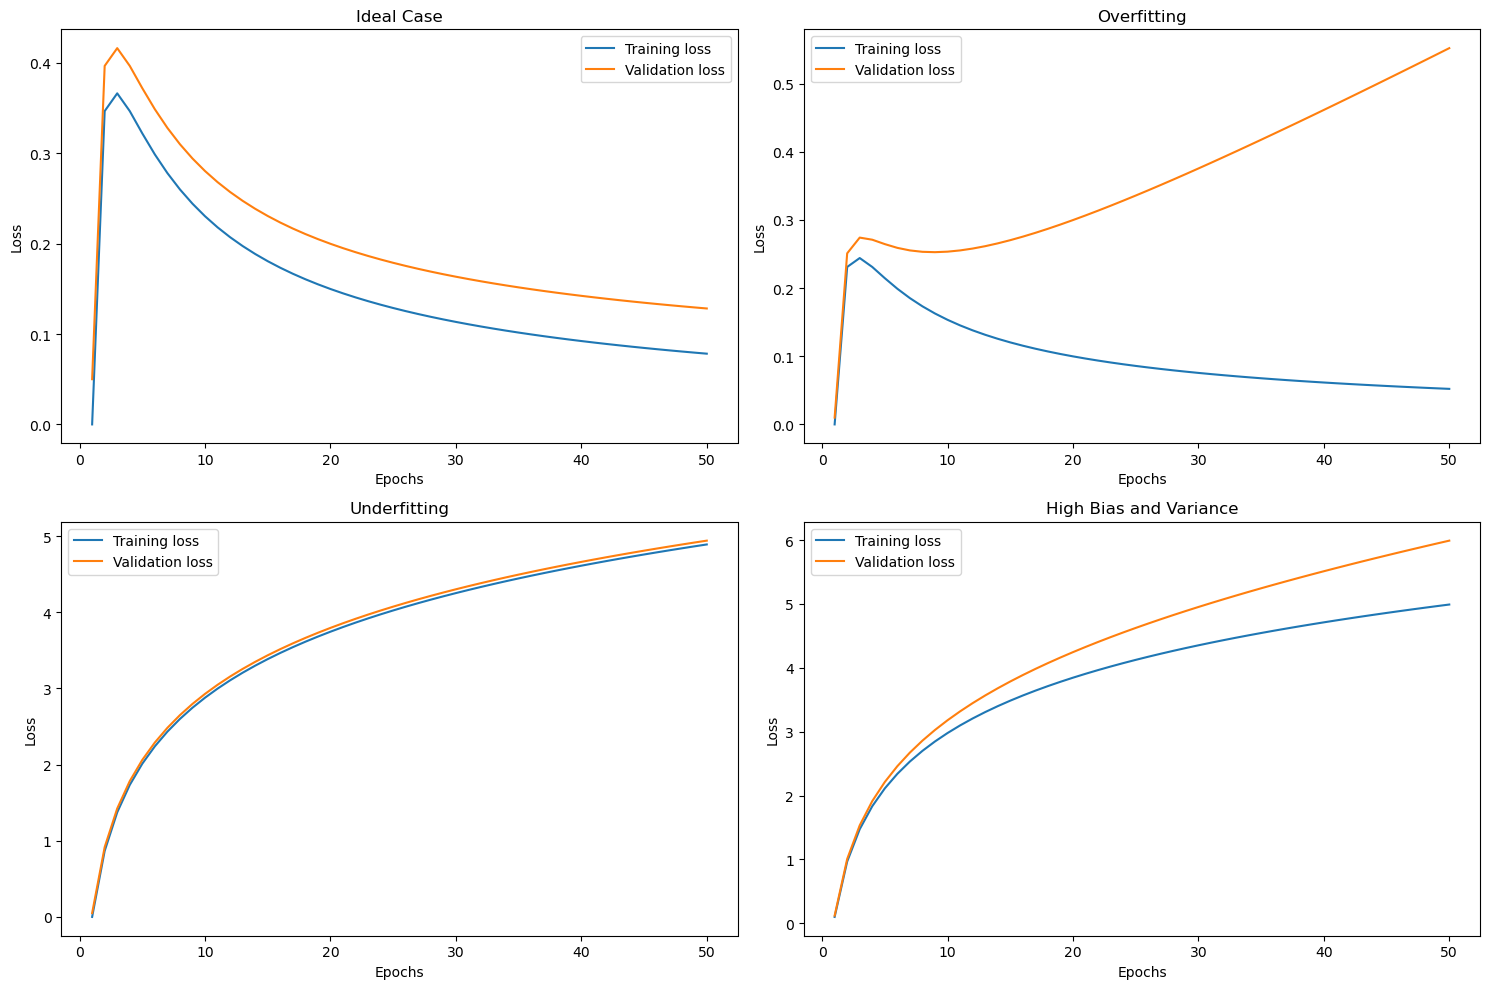

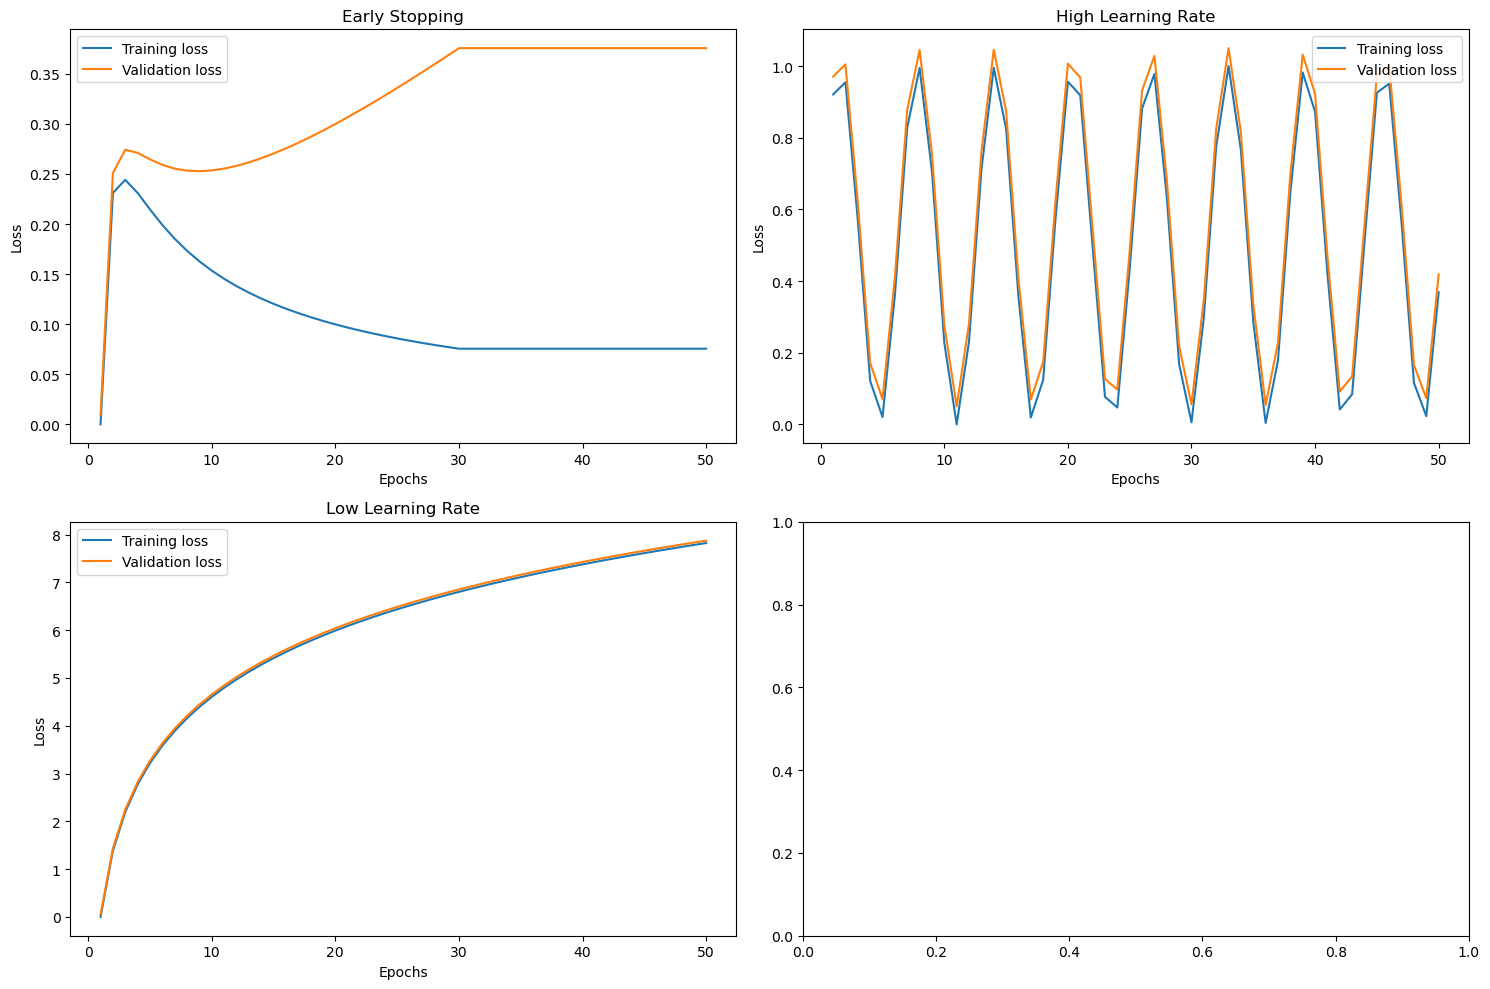

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the number of epochs
epochs = np.arange(1, 51)

# Generate losses for ideal case
train_loss_ideal = np.log(epochs) / epochs
val_loss_ideal = train_loss_ideal + 0.05

# Generate losses for overfitting
train_loss_overfitting = np.log(epochs) / (1.5 * epochs)
val_loss_overfitting = train_loss_overfitting + 0.1 * epochs / 10

# Generate losses for underfitting
train_loss_underfitting = np.log(epochs) / 0.8
val_loss_underfitting = train_loss_underfitting + 0.05

# Generate losses for high bias and variance
train_loss_hbv = np.log(epochs) / 0.8 + 0.1
val_loss_hbv = train_loss_hbv + 0.2 * epochs / 10

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot ideal case
axs[0, 0].plot(epochs, train_loss_ideal, label='Training loss')
axs[0, 0].plot(epochs, val_loss_ideal, label='Validation loss')
axs[0, 0].set_title('Ideal Case')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plot overfitting case
axs[0, 1].plot(epochs, train_loss_overfitting, label='Training loss')
axs[0, 1].plot(epochs, val_loss_overfitting, label='Validation loss')
axs[0, 1].set_title('Overfitting')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plot underfitting case
axs[1, 0].plot(epochs, train_loss_underfitting, label='Training loss')
axs[1, 0].plot(epochs, val_loss_underfitting, label='Validation loss')
axs[1, 0].set_title('Underfitting')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()

# Plot high bias and variance case
axs[1, 1].plot(epochs, train_loss_hbv, label='Training loss')
axs[1, 1].plot(epochs, val_loss_hbv, label='Validation loss')
axs[1, 1].set_title('High Bias and Variance')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].legend()

# Display the plot
plt.tight_layout()
plt.show()

# Generate losses for early stopping
train_loss_early_stopping = np.log(epochs) / (1.5 * epochs)
val_loss_early_stopping = train_loss_early_stopping + 0.1 * epochs / 10
# Let's say we stop at epoch 30
train_loss_early_stopping[30:] = train_loss_early_stopping[29]
val_loss_early_stopping[30:] = val_loss_early_stopping[29]

# Generate losses for high learning rate
train_loss_high_lr = np.sin(epochs) / 2 + 0.5
val_loss_high_lr = train_loss_high_lr + 0.05

# Generate losses for low learning rate
train_loss_low_lr = np.log(epochs) / 0.5
val_loss_low_lr = train_loss_low_lr + 0.05

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot early stopping case
axs[0, 0].plot(epochs, train_loss_early_stopping, label='Training loss')
axs[0, 0].plot(epochs, val_loss_early_stopping, label='Validation loss')
axs[0, 0].set_title('Early Stopping')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plot high learning rate case
axs[0, 1].plot(epochs, train_loss_high_lr, label='Training loss')
axs[0, 1].plot(epochs, val_loss_high_lr, label='Validation loss')
axs[0, 1].set_title('High Learning Rate')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plot low learning rate case
axs[1, 0].plot(epochs, train_loss_low_lr, label='Training loss')
axs[1, 0].plot(epochs, val_loss_low_lr, label='Validation loss')
axs[1, 0].set_title('Low Learning Rate')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()

# Display the plot
plt.tight_layout()
plt.show()



This script plots four sets of learning curves for four different scenarios:

- `Ideal Case:` Both training and validation losses decrease and eventually plateau.

- `Overfitting:` Training loss continues to decrease, but validation loss decreases then starts to increase, indicating the model is overfitting the training data.

- `Underfitting:` Both training and validation losses decrease slowly and remain high, indicating the model is not complex enough to learn the data.

- `High Bias and Variance: `Training loss is high and validation loss is even higher, indicating the model is not fitting the data well and is not generalizing well either.

In reality, you might see variations of these trends and may also see some noise in the plots depending on the specific dataset, model, and training process.

### **Other cases:**
- **`Early Stopping:`** In this case, the model starts to overfit after a certain number of epochs. Early stopping allows us to prevent overfitting by stopping the training once the validation loss starts to increase..

- **`Learning Rate Too High:`** If the learning rate is too high, the loss may not decrease and could even increase explosively.

- **`Learning Rate Too Low:`** If the learning rate is too low, the loss decreases very slowly and might never reach its minimum..

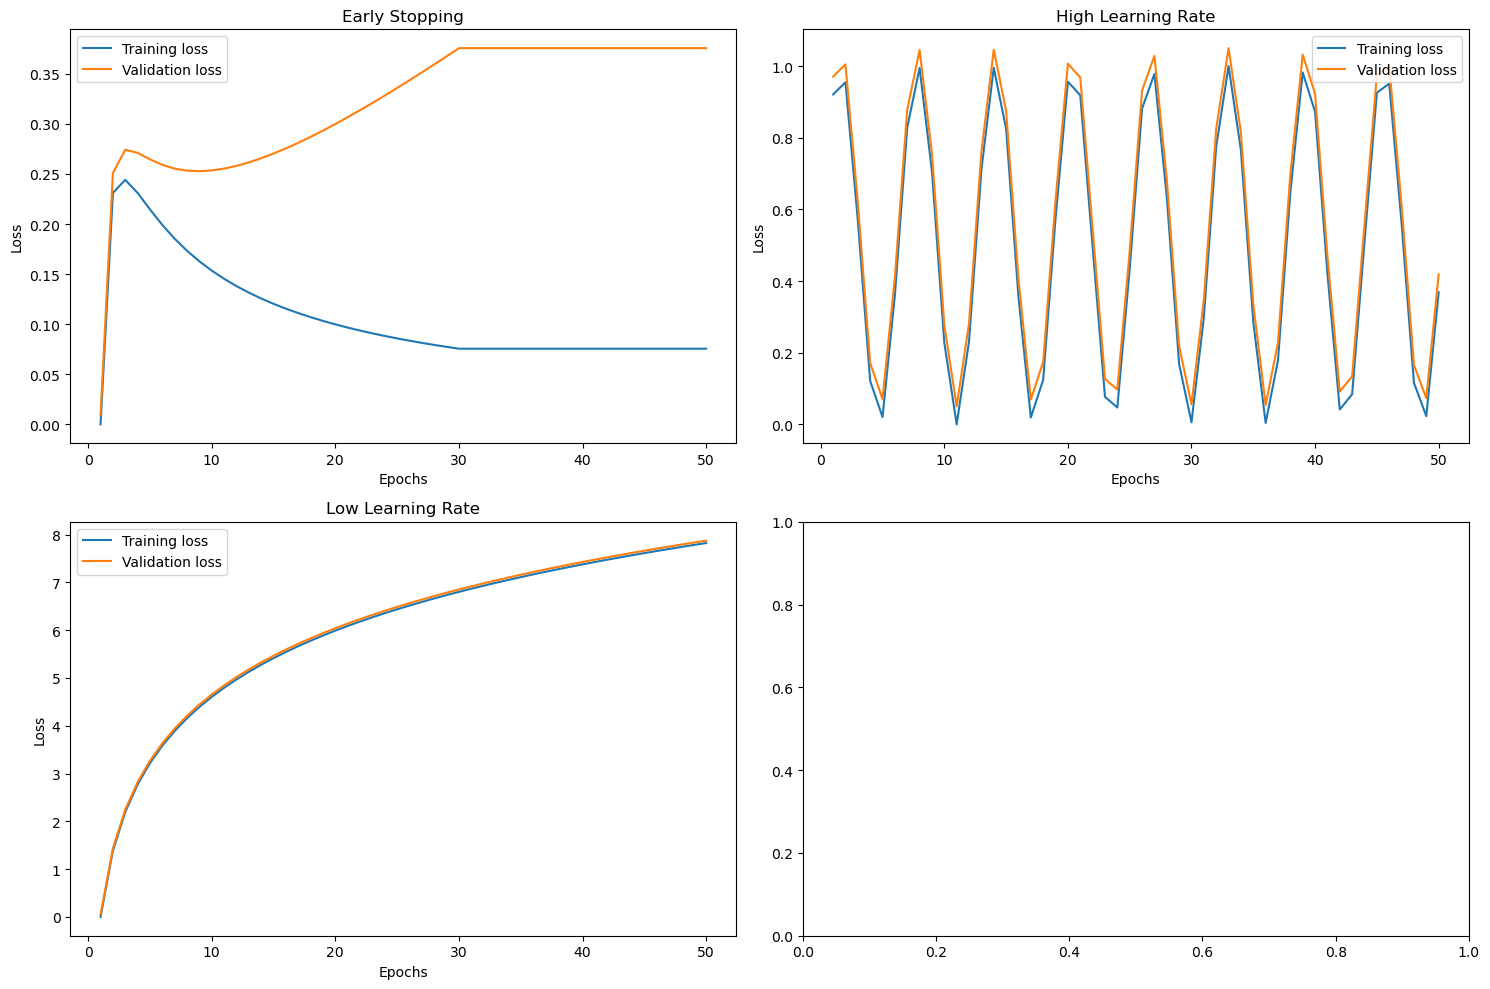

In [3]:
# Generate losses for early stopping
train_loss_early_stopping = np.log(epochs) / (1.5 * epochs)
val_loss_early_stopping = train_loss_early_stopping + 0.1 * epochs / 10
# Let's say we stop at epoch 30
train_loss_early_stopping[30:] = train_loss_early_stopping[29]
val_loss_early_stopping[30:] = val_loss_early_stopping[29]

# Generate losses for high learning rate
train_loss_high_lr = np.sin(epochs) / 2 + 0.5
val_loss_high_lr = train_loss_high_lr + 0.05

# Generate losses for low learning rate
train_loss_low_lr = np.log(epochs) / 0.5
val_loss_low_lr = train_loss_low_lr + 0.05

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot early stopping case
axs[0, 0].plot(epochs, train_loss_early_stopping, label='Training loss')
axs[0, 0].plot(epochs, val_loss_early_stopping, label='Validation loss')
axs[0, 0].set_title('Early Stopping')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plot high learning rate case
axs[0, 1].plot(epochs, train_loss_high_lr, label='Training loss')
axs[0, 1].plot(epochs, val_loss_high_lr, label='Validation loss')
axs[0, 1].set_title('High Learning Rate')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plot low learning rate case
axs[1, 0].plot(epochs, train_loss_low_lr, label='Training loss')
axs[1, 0].plot(epochs, val_loss_low_lr, label='Validation loss')
axs[1, 0].set_title('Low Learning Rate')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()

# Display the plot
plt.tight_layout()
plt.show()


In these plots:

**`Early Stopping:`** Training loss and validation loss stop decreasing at the same point, indicating that training was stopped early to prevent overfitting.

**`High Learning Rate:`** The losses fluctuate wildly, which can be a symptom of a learning rate that's too high.

**`Low Learning Rate:`** The losses decrease very slowly, which can indicate a learning rate that's too low.

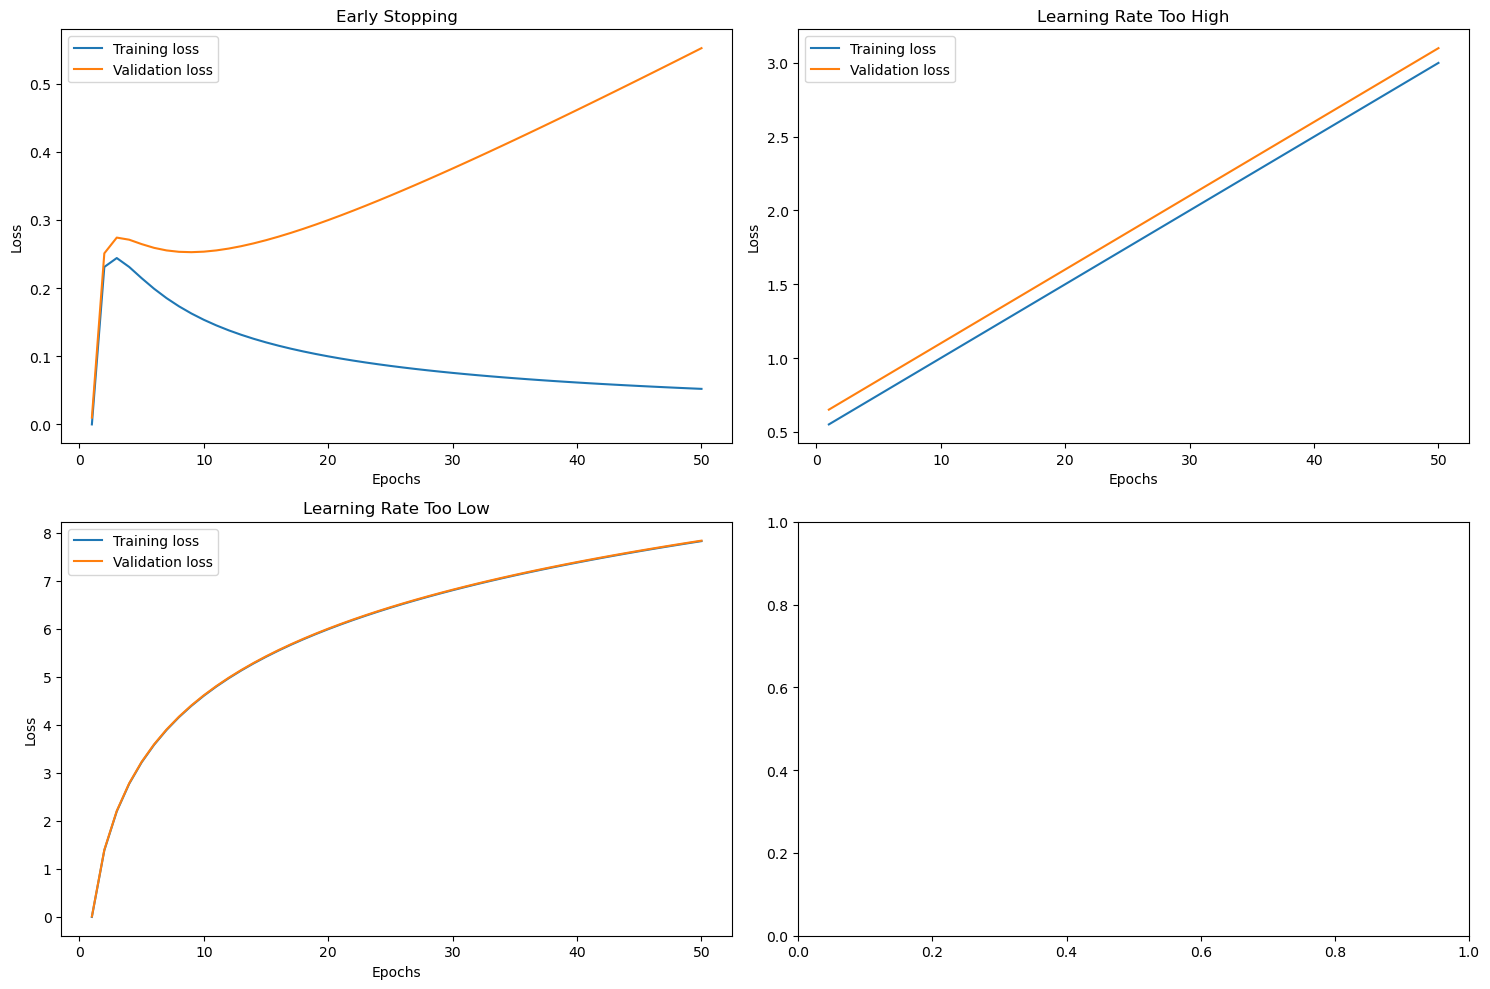

In [4]:
# Set up the number of epochs
epochs = np.arange(1, 51)

# Generate losses for early stopping
train_loss_early_stopping = np.log(epochs) / (1.5 * epochs)
val_loss_early_stopping = train_loss_early_stopping + 0.01 * epochs 

# Generate losses for learning rate too high
train_loss_high_lr = 0.5 + epochs*0.05
val_loss_high_lr = train_loss_high_lr + 0.1

# Generate losses for learning rate too low
train_loss_low_lr = np.log(epochs) / 0.5
val_loss_low_lr = train_loss_low_lr + 0.01

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot early stopping case
axs[0, 0].plot(epochs, train_loss_early_stopping, label='Training loss')
axs[0, 0].plot(epochs, val_loss_early_stopping, label='Validation loss')
axs[0, 0].set_title('Early Stopping')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plot learning rate too high case
axs[0, 1].plot(epochs, train_loss_high_lr, label='Training loss')
axs[0, 1].plot(epochs, val_loss_high_lr, label='Validation loss')
axs[0, 1].set_title('Learning Rate Too High')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plot learning rate too low case
axs[1, 0].plot(epochs, train_loss_low_lr, label='Training loss')
axs[1, 0].plot(epochs, val_loss_low_lr, label='Validation loss')
axs[1, 0].set_title('Learning Rate Too Low')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()

# Display the plot
plt.tight_layout()
plt.show()
